## Observations and Insights 

In [1]:
# Dependencies and Setup .agg
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_items = merge_df["Mouse ID"].count()
count_items

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_merge_df = merge_df[merge_df.duplicated()]
duplicate_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
indexed_merge_df = merge_df.set_index("Mouse ID")
indexed_merge_df.loc[["g989"], : ]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dupe_last = merge_df.drop_duplicates(subset=['Mouse ID'],keep='last')
drop_dupe_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_merge_df = merge_df["Mouse ID"].nunique()
unique_merge_df

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
merge_grpby = merge_df.groupby('Drug Regimen')

merge_grpby_mean = merge_grpby["Tumor Volume (mm3)"].mean()
merge_grpby_med = merge_grpby["Tumor Volume (mm3)"].median()
merge_grpby_var = merge_grpby["Tumor Volume (mm3)"].var()
merge_grpby_std = merge_grpby["Tumor Volume (mm3)"].std()
merge_grpby_sem = merge_grpby["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
merge_grpby_df = {"Mean": merge_grpby_mean, "Median": merge_grpby_med, "Variance": merge_grpby_var, "STdev": merge_grpby_std, "SEM": merge_grpby_sem}

merge_grpby_df = pd.DataFrame(merge_grpby_df)
merge_grpby_df

,Mean,Median,Variance,STdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merge_grpbyag = merge_grpby.agg(["mean","median","var","std","sem"])
merge_grpbyag

Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.894410    8.0  53.357531  7.304624  0.575685  27.043478   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.791848  1.670882  0.131684  ...          52.322552   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.854632  42.351070  6.507770  0.512884         0.975155   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.174379  1.083688  0.085407  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

In [9]:
#getting counts for bar charts
valcow = merge_df['Drug Regimen'].value_counts()

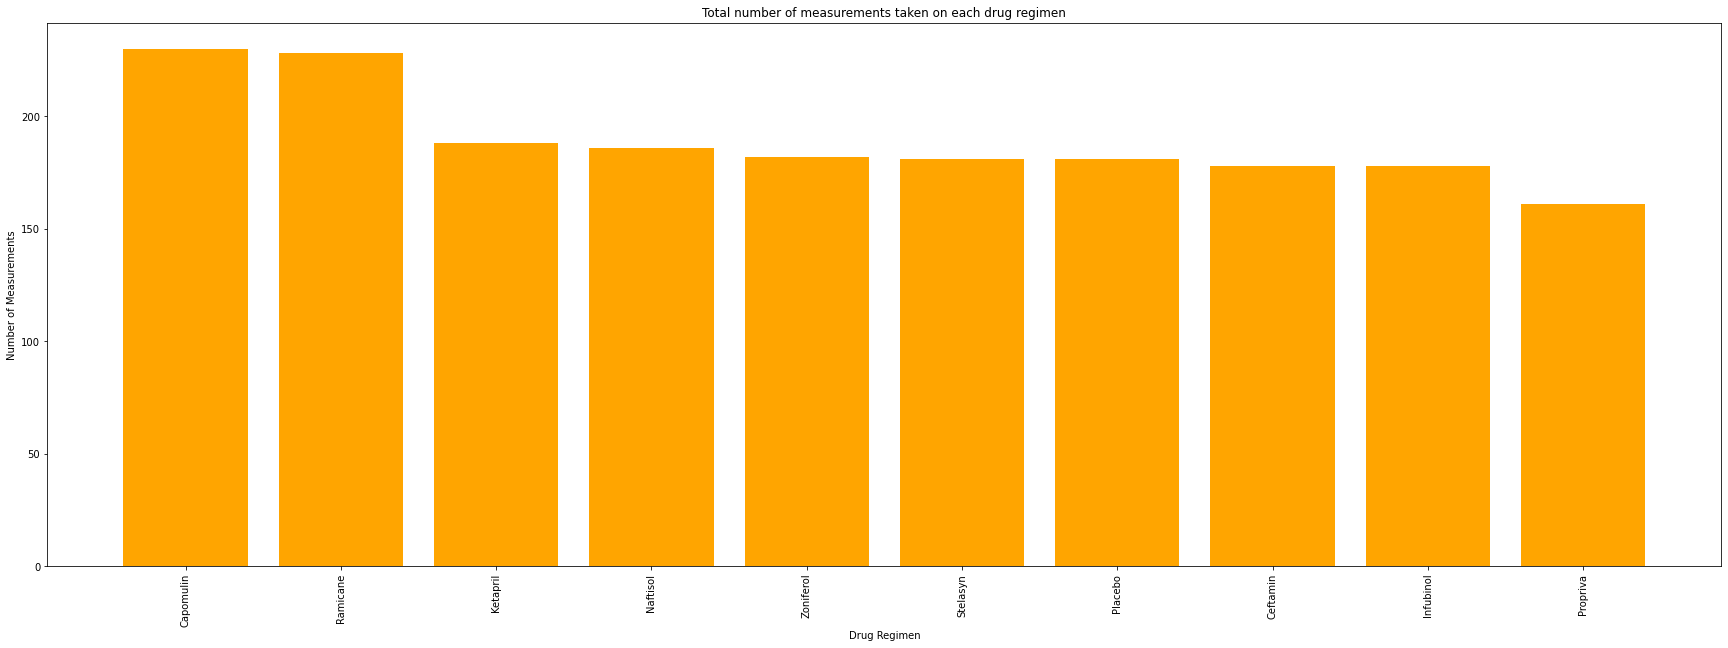

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
xaxis_ = np.arange(len(valcow))
plt.figure(figsize=(30,10))
plt.bar(xaxis_,valcow, color='orange')
tick_locations = [value for value in xaxis_]
plt.xticks(tick_locations,['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn',
                           'Placebo','Ceftamin','Infubinol','Propriva'],rotation="vertical")
plt.title("Total number of measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

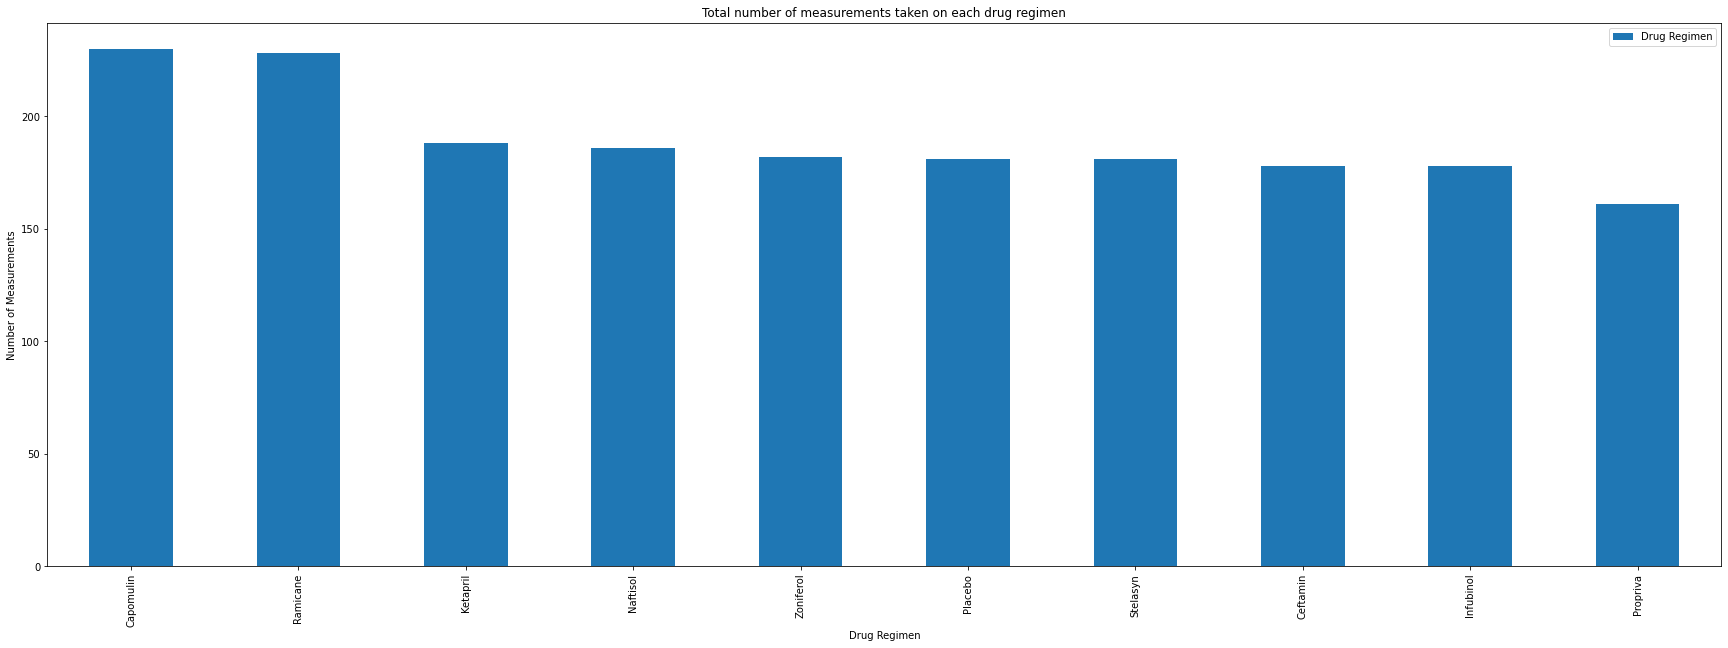

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
valcow.plot(kind='bar',figsize=(30,10))
plt.title("Total number of measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc='best')
plt.show()
plt.tight_layout()

In [14]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sx = drop_dupe_last.groupby('Sex')
count_sx = mice_sx['Sex'].count()
mice_df = pd.DataFrame(mice_sx)
count_df = pd.DataFrame(count_sx)

Text(0.5, 1.0, 'Mouse Gender Percentage')

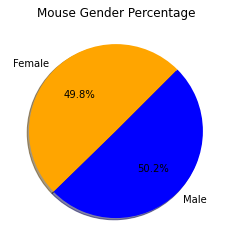

In [16]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

labels = mice_df[0]
sizes = count_df['Sex']
colors = ["orange", "blue"]
explode = (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Mouse Gender Percentage")

<AxesSubplot:title={'center':'Mouse Gender Percentage'}, ylabel='Sex'>

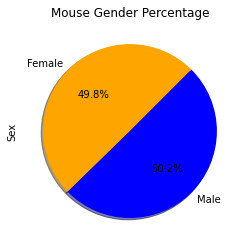

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sx.plot(kind='pie',y=mice_sx,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45, title="Mouse Gender Percentage")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
only_4 = drop_dupe_last.loc[(drop_dupe_last["Drug Regimen"] == "Capomulin") | (drop_dupe_last["Drug Regimen"] == "Ramicane") | (drop_dupe_last["Drug Regimen"] == "Infubinol") | (drop_dupe_last["Drug Regimen"] == "Ceftamin"), :]
# Start by getting the last (greatest) timepoint for each mouse
only_4

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


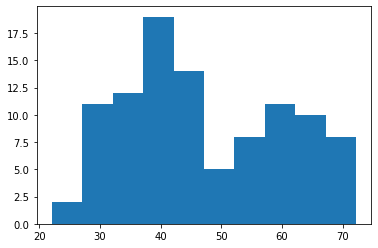

In [19]:
# add subset
plt.hist(only_4['Tumor Volume (mm3)'])
plt.show()

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
abc = only_4['Tumor Volume (mm3)']

Capomulin = only_4.loc[only_4["Drug Regimen"] == "Capomulin", :] 

Ramicane = only_4.loc[only_4["Drug Regimen"] == "Ramicane", :]

Infubinol = only_4.loc[only_4["Drug Regimen"] == "Infubinol", :]

Ceftamin = only_4.loc[only_4["Drug Regimen"] == "Ceftamin", :]

# Locate the rows which contain mice on each drug and get the tumor volumes
cap_tv = Capomulin['Tumor Volume (mm3)']
inf_tv = Infubinol['Tumor Volume (mm3)']
ram_tv = Ramicane['Tumor Volume (mm3)']
cef_tv = Ceftamin['Tumor Volume (mm3)']

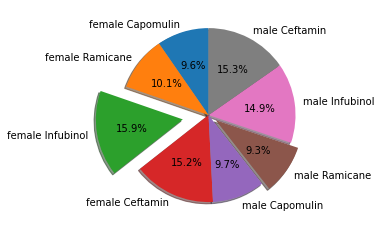

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# I was going to leave this blank up there being confused but decided to do something with it,
#I unerstand it was for no reason but I actually wanted to see this so I did it for me. Sorry.
female_Capomulin = Capomulin.loc[Capomulin['Sex'] == "Female", :]
fem_cap_mean = female_Capomulin['Tumor Volume (mm3)'].mean()
male_Capomulin = Capomulin.loc[Capomulin['Sex'] == "Male", :]
male_cap_mean = male_Capomulin['Tumor Volume (mm3)'].mean()
#
female_Ramicane = Ramicane.loc[Ramicane['Sex'] == "Female", :]
fem_ram_mean = female_Ramicane['Tumor Volume (mm3)'].mean()
male_Ramicane = Ramicane.loc[Ramicane['Sex'] == "Male", :]
male_ram_mean = male_Ramicane['Tumor Volume (mm3)'].mean()
#
female_Infubinol = Infubinol.loc[Infubinol['Sex'] == "Female", :]
fem_inf_mean = female_Infubinol['Tumor Volume (mm3)'].mean()
male_Infubinol = Infubinol.loc[Infubinol['Sex'] == "Male", :]
male_inf_mean = male_Infubinol['Tumor Volume (mm3)'].mean()
#
female_Ceftamin = Ceftamin.loc[Ceftamin['Sex'] == "Female", :]
fem_ceft_mean = female_Ceftamin['Tumor Volume (mm3)'].mean()
male_Ceftamin = Ceftamin.loc[Ceftamin['Sex'] == "Male", :]
male_ceft_mean = male_Ceftamin['Tumor Volume (mm3)'].mean()

explode = (0,0,.3,0,0,.1,0,0)

yregimen_pie = ["female Capomulin","female Ramicane","female Infubinol","female Ceftamin","male Capomulin","male Ramicane","male Infubinol","male Ceftamin"]
regimen_sx_pie = [fem_cap_mean,fem_ram_mean,fem_inf_mean,fem_ceft_mean,male_cap_mean,male_ram_mean,male_inf_mean,male_ceft_mean]
plt.pie(regimen_sx_pie,labels=yregimen_pie,startangle=90,autopct='%1.1f%%',shadow=True,explode=explode)
plt.show()

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds

quartiles = abc.quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"The lower quartile of tumors are: {lowerq}")
print(f"The upper quartile of tumors are: {upperq}")
print(f"The interquartile range of tumors are: {iqr}")
print(f"The median of tumors are: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = only_4.loc[(only_4['Tumor Volume (mm3)']<lower_bound) 
           | (only_4['Tumor Volume (mm3)']>upper_bound)]

print(outliers)

The lower quartile of tumors are: 37.19
The upper quartile of tumors are: 59.93
The interquartile range of tumors are: 22.74
The median of tumors are: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


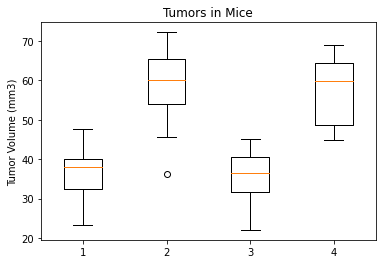

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors in Mice')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot((cap_tv,inf_tv,ram_tv,cef_tv)) 
plt.show()

## Line and Scatter Plots

In [36]:
#creating dataframe for line chart
s185_line = merge_df["Mouse ID"] == "s185"
s185_df = merge_df[s185_line]
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


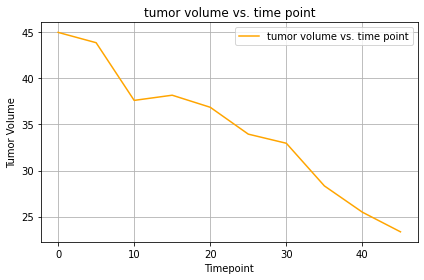

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
xaxis_time = s185_df['Timepoint']
yaxis_tumor = s185_df['Tumor Volume (mm3)']
Tumor_Vol, = plt.plot(xaxis_time, yaxis_tumor, color="orange", label="tumor volume vs. time point")
plt.title("tumor volume vs. time point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

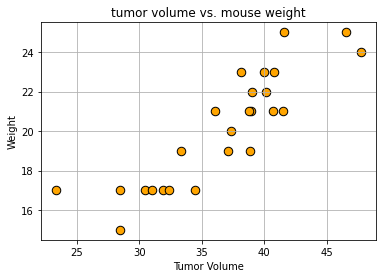

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
xaxis_tumor = Capomulin['Tumor Volume (mm3)']
yaxis_time = Capomulin['Weight (g)']
plt.scatter(xaxis_tumor,yaxis_time, marker='o', facecolors='orange', edgecolors='black',s=abc.max())
plt.title("tumor volume vs. mouse weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
plt.grid()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.88


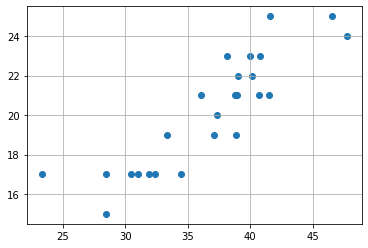

In [42]:
tumor_capo = Capomulin['Tumor Volume (mm3)']
weight_capo = Capomulin['Weight (g)']
correlation = st.pearsonr(tumor_capo,weight_capo)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(tumor_capo,weight_capo)
plt.grid()

y = 0.44x + 4.02


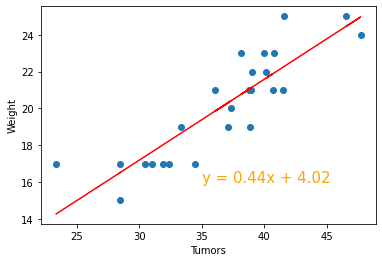

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(tumor_capo, weight_capo)
regress_values = tumor_capo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tumor_capo,weight_capo)
plt.plot(tumor_capo,regress_values,"r-")
plt.annotate(line_eq,(35,16),fontsize=15,color="orange")
plt.xlabel('Tumors')
plt.ylabel('Weight')
print(line_eq)
plt.show()